In [1]:
import fsspec

fs_read = fsspec.filesystem('s3', anon=True, skip_instance_cache=True, use_ssl=False) # For now SSL false is solving my cert issues **shrug**
fs_write = fsspec.filesystem('') # For now we are writing to local disk

In [2]:
dbofs_files = fs_read.glob('s3://nextgen-dmac/nos/nos.dbofs.fields.f*.*.t*z.nc.zarr')

dbofs_files = sorted(['s3://'+f for f in dbofs_files])
dbofs_files

['s3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t00z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t06z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t12z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t18z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t00z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t06z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t12z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t18z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230317.t00z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230317.t06z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230317.t12z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230317.t18z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230318.t00z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230318.t06z.nc.zarr',
 's3://nextgen-dmac/

In [10]:
import re
import datetime
from typing import Tuple

def extract_forecast_time_index(key) -> Tuple[str, int]:
    offset, model_date, model_hour = re.search(r'f(\d{3}).(\d{8}).t(\d{2})', key).groups()
    model_date = datetime.datetime.strptime(f'{model_date}T{model_hour}', '%Y%m%dT%H') + datetime.timedelta(hours=int(offset))
    model_date_key = model_date.strftime('%Y%m%dT%H')
    return model_date_key, int(offset)

In [14]:
extract_forecast_time_index('s3://nextgen-dmac/nos/nos.dbofs.fields.f026.20230321.t12z.nc.zarr')

indexes = {}

for f in dbofs_files:
    model_date_key, offset = extract_forecast_time_index(f)
    if model_date_key not in indexes:
        indexes[model_date_key] = [offset, f]
    else: 
        if offset < indexes[model_date_key][0]:
            indexes[model_date_key] = [offset, f]

indexes 

{'20230315T01': [1,
  's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t00z.nc.zarr'],
 '20230315T07': [1,
  's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t06z.nc.zarr'],
 '20230315T13': [1,
  's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t12z.nc.zarr'],
 '20230315T19': [1,
  's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t18z.nc.zarr'],
 '20230316T01': [1,
  's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t00z.nc.zarr'],
 '20230316T07': [1,
  's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t06z.nc.zarr'],
 '20230316T13': [1,
  's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t12z.nc.zarr'],
 '20230316T19': [1,
  's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t18z.nc.zarr'],
 '20230317T01': [1,
  's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230317.t00z.nc.zarr'],
 '20230317T07': [1,
  's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230317.t06z.nc.zarr'],
 '20230317T13': [1,
  's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230317.t12z

In [15]:
dbofs_best_files = [x[1] for x in list(indexes.values())]
dbofs_best_files

['s3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t00z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t06z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t12z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230315.t18z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t00z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t06z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t12z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230316.t18z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230317.t00z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230317.t06z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230317.t12z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230317.t18z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230318.t00z.nc.zarr',
 's3://nextgen-dmac/nos/nos.dbofs.fields.f001.20230318.t06z.nc.zarr',
 's3://nextgen-dmac/

In [17]:
from kerchunk.combine import MultiZarrToZarr
import ujson

mzz = MultiZarrToZarr(
    dbofs_best_files, 
    remote_protocol='s3', 
    remote_options={'anon': True, 'use_ssl': False},
    concat_dims=['ocean_time'],
    identical_dims=['eta_rho', 'xi_rho', 's_rho', 'eta_psi', 'xi_psi', 's_w', 'eta_u', 'xi_u', 'eta_v', 'xi_v', 'lat_rho', 'lat_psi', 'lat_u', 'lat_v', 'lon_rho', 'lon_psi', 'lon_u', 'lon_v']
)

d = mzz.translate()

with fs_write.open('nos.dbofs.fields.best.zarr', 'wb') as f:
    f.write(ujson.dumps(d).encode())
    print('Successfully wrote kerchunked nos collection to disk')

Successfully wrote kerchunked nos collection to disk


In [2]:
import xarray as xr

# open dataset as zarr object using fsspec reference file system and xarray
fs = fsspec.filesystem("filecache", 
                       target_protocol='reference', 
                       target_options={
                           'fo': 's3://nextgen-dmac/nos/nos.dbofs.fields.best.nc.zarr', 
                           'target_protocol': 's3', 
                           'target_options': {'anon':True, 'use_ssl': False}, 
                           'remote_protocol': 's3', 
                           'remote_options': {'anon':True, 'use_ssl': False}
                        })
m = fs.get_mapper("") 

ds = xr.open_dataset(m, engine="zarr", backend_kwargs=dict(consolidated=False), 
                      chunks={'ocean_time':1})
ds

<xarray.Dataset>
Dimensions:        (ocean_time: 798, tracer: 2, s_rho: 10, s_w: 11,
                    boundary: 4, eta_rho: 732, xi_rho: 119, eta_psi: 731,
                    xi_psi: 118, eta_u: 732, xi_u: 118, eta_v: 731, xi_v: 119)
Coordinates:
    lat_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(731, 118), meta=np.ndarray>
    lat_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(732, 119), meta=np.ndarray>
    lat_u          (eta_u, xi_u) float64 dask.array<chunksize=(732, 118), meta=np.ndarray>
    lat_v          (eta_v, xi_v) float64 dask.array<chunksize=(731, 119), meta=np.ndarray>
    lon_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(731, 118), meta=np.ndarray>
    lon_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(732, 119), meta=np.ndarray>
    lon_u          (eta_u, xi_u) float64 dask.array<chunksize=(732, 118), meta=np.ndarray>
    lon_v          (eta_v, xi_v) float64 dask.array<chunksize=(731, 119), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2023-06-24T01:00:00 ... 2023-0...
  * s_rho          (s_rho) float64 -0.95 -0.85 -0.75 -0.65 ... -0.25 -0.15 -0.05
  * s_w            (s_w) float64 -1.0 -0.9 -0.8 -0.7 -0.6 ... -0.3 -0.2 -0.1 0.0
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_psi,
                                xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/79)
    Akk_bak        (ocean_time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    Akp_bak        (ocean_time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    Akt_bak        (ocean_time, tracer) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    Akv_bak        (ocean_time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    Cs_r           (ocean_time, s_rho) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    Cs_w           (ocean_time, s_w) float64 dask.array<chunksize=(1, 11), meta=np.ndarray>
    ...             ...
    theta_s        (ocean_time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    u              (ocean_time, s_rho, eta_u, xi_u) float32 dask.array<chunksize=(1, 10, 732, 118), meta=np.ndarray>
    v              (ocean_time, s_rho, eta_v, xi_v) float32 dask.array<chunksize=(1, 10, 731, 119), meta=np.ndarray>
    w              (ocean_time, s_w, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 6, 732, 119), meta=np.ndarray>
    xl             (ocean_time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    zeta           (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 732, 119), meta=np.ndarray>
Attributes: (12/33)
    CPP_options:       mode, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX, ANA_BTFLUX, AN...
    Conventions:       CF-1.4, SGRID-0.3
    NLM_LBC:           \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Cha    C...
    NLM_TADV:          \nADVECTION:   HORIZONTAL   VERTICAL     \ntemp:      ...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_ra...
    bry_file_01:       nos.dbofs.obc.20230624.t00z.nc
    ...                ...
    svn_url:           
    tide_file:         nos.dbofs.roms.tides.nc
    tiling:            008x016
    title:             dbofs forecast RUN in operational mode
    type:              ROMS/TOMS history file
    var_info:          varinfo.yaml

In [6]:
ds.cf["grid_topology"].attrs['node_coordinates'].split(' ')

['lon_psi', 'lat_psi']

/Users/matthewiannucci/Developer/aggregate_ofs/env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


(-8652876.920232963, -8155728.577340467, 4526450.29397872, 4868634.279372582)

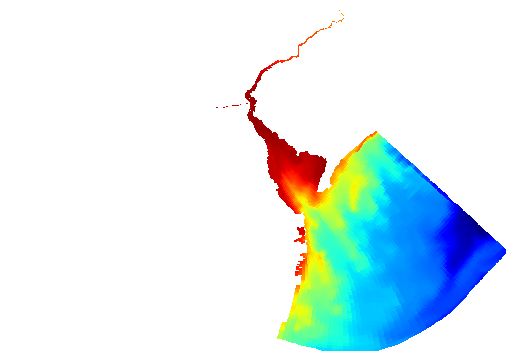

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

sst = ds.temp.isel(ocean_time=-1, s_rho=0).values

# plt.pcolormesh(ds.lon_rho, ds.lat_rho, temp)
ax = plt.axes(projection=ccrs.Mercator())
plt.pcolormesh(ds.lon_rho, ds.lat_rho, sst, transform=ccrs.PlateCarree(), cmap='jet')
ax.set_extent([ds.lon_rho.min(), ds.lon_rho.max(), ds.lat_rho.min(), ds.lat_rho.max()], crs=ccrs.PlateCarree())
ax.axis('off')